# **Training CNN Model to predict mask detection using Images**

# **Importing necessary libraries**

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
import matplotlib.pyplot as plt 
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.0


# **Loading dataset**

In [ ]:
train_data_path = "/content/drive/MyDrive/Data/Face Mask Detection/dataset/train"
validation_data_path = "/content/drive/MyDrive/Data/Face Mask Detection/dataset/valid"

# **Plotting parameters**

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


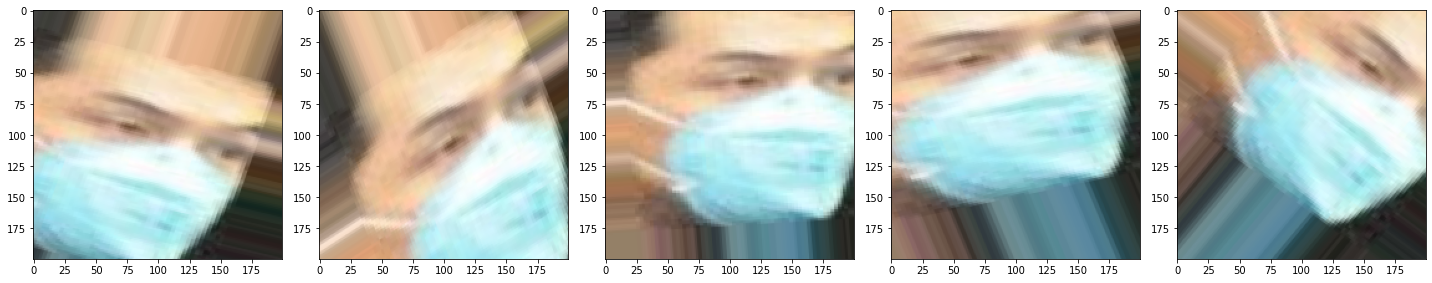

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/Data/Face Mask Detection/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# **Building CNN model**

In [ ]:

cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Train CNN model**

In [ ]:

history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
 8/29 [=======>......................] - ETA: 19:57 - loss: 0.6944 - accuracy: 0.5286

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 2144s 74s/step - loss: 0.6291 - accuracy: 0.6144 - val_loss: 0.2473 - val_accuracy: 0.9057

Epoch 00001: val_accuracy improved from -inf to 0.90571, saving model to /content/drive/MyDrive/Data/Face Mask Detection/model/model.h5
Epoch 2/50
29/29 [==============================] - 173s 6s/step - loss: 0.3514 - accuracy: 0.8703 - val_loss: 0.2010 - val_accuracy: 0.9355

Epoch 00002: val_accuracy improved from 0.90571 to 0.93548, saving model to /content/drive/MyDrive/Data/Face Mask Detection/model/model.h5
Epoch 3/50
29/29 [==============================] - 170s 6s/step - loss: 0.3192 - accuracy: 0.8832 - val_loss: 0.1689 - val_accuracy: 0.9367

Epoch 00003: val_accuracy improved from 0.93548 to 0.93672, saving model to /content/drive/MyDrive/Data/Face Mask Detection/model/model.h5
Epoch 4/50
29/29 [==============================] - 171s 6s/step - loss: 0.2657 - accuracy: 0.8986 - val_loss: 0.1492 - val_accuracy: 0.9467

Epoch 00004: val_accuracy i

# **Save model**

In [ ]:
cnn_model.save('/content/drive/MyDrive/Data/Face Mask Detection/model/model_last.h5')

# **Summarize history for accuracy and loss**

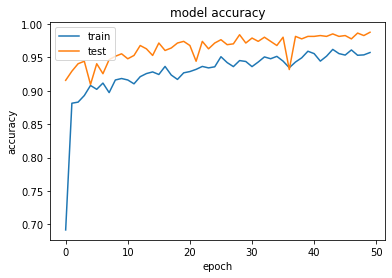

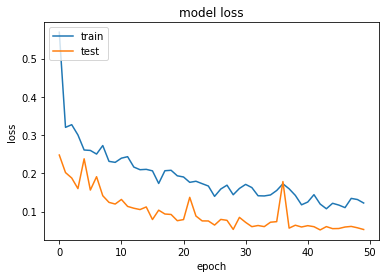

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()